In [103]:
import pandas as pd
import os

In [104]:
df=pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files=[file for file in os.listdir("./Sales_Data")]
all_sales_data=pd.DataFrame()
for file in files:
    df=pd.read_csv("./Sales_Data/"+file)
    all_sales_data=pd.concat([all_sales_data, df])
    
all_sales_data.to_csv("all_data.csv",index=False)

all_data=pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [ ]:
###Clean up data

In [112]:
nan_df= all_data[all_data.isna().any(axis=1)]
nan_df.head()
all_data= all_data.dropna(how='all')
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [113]:
all_data = all_data[all_data['Order Date'].str[:2] !='Or']

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### what was the best month for the sale ? How much was earned ?

In [114]:
all_data['Quantity Ordered'] =pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] =pd.to_numeric(all_data['Price Each'])

In [115]:
all_data['Month']=all_data["Order Date"].str[:2]
all_data['Month']=all_data['Month'].astype('int32')

all_data.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [116]:
all_data['Sales']=all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [147]:
results=all_data.groupby('Month').sum()
print(results)

       Quantity Ordered    Price Each         Sales    Hour
Month                                                      
1                 10903  1.811768e+06  1.822257e+06  139485
2                 13449  2.188885e+06  2.202022e+06  172669
3                 17005  2.791208e+06  2.807100e+06  218969
4                 20558  3.367671e+06  3.390670e+06  262259
5                 18667  3.135125e+06  3.152607e+06  238780
6                 15253  2.562026e+06  2.577802e+06  195528
7                 16072  2.632540e+06  2.647776e+06  206169
8                 13448  2.230345e+06  2.244468e+06  172289
9                 13109  2.084992e+06  2.097560e+06  168513
10                22703  3.715555e+06  3.736727e+06  290650
11                19798  3.180601e+06  3.199603e+06  254865
12                28114  4.588415e+06  4.613443e+06  359978


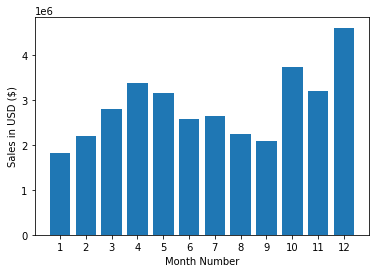

In [106]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()

### The best month for sale was month 12 which is December.The sale in this month was 4,613,443 USD.Since the data is of company in US.One of the main reasons why it was the best month is because December is a month of festivals especially it is the month Christmas .

## which city had the highest number of sales ?

In [118]:
all_data['City'] = all_data['Purchase Address'].str.split(",").str[1] +" " + all_data['Purchase Address'].str.split(",").str[2].str.split(" ").str[1]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [129]:
highest_sale_by_city =all_data.groupby('City').sum()
highest_sale_by_city


,Quantity Ordered,Price Each,Month,Sales,Hour
City,,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06,214264
Austin TX,11153,1.809874e+06,69829,1.819582e+06,141946
Boston MA,22528,3.637410e+06,141112,3.661642e+06,288225
Dallas TX,16730,2.752628e+06,104620,2.767975e+06,214390
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06,427444
New York City NY,27932,4.635371e+06,175741,4.664317e+06,357696
Portland ME,2750,4.471893e+05,17144,4.497583e+05,35211
Portland OR,11303,1.860558e+06,70621,1.870732e+06,144421
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06,643265


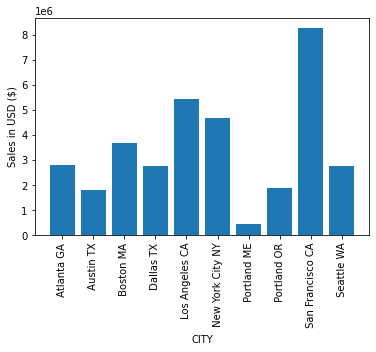

In [128]:
cities =[city for city,df in all_data.groupby('City')]
plt.bar(cities,highest_sale_by_city['Sales'])
plt.xticks(cities,rotation = 'vertical')
plt.ylabel('Sales in USD ($)')
plt.xlabel('CITY')
plt.show()

### San Fransisco had the highest number of sales.Since the product of the company is mostly electronics and San Fransisco(silicon valley) has huge demand of electronics.We can see why San Fransisco has highest number of sales.

## peak hours of the sale ?

In [127]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] =all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


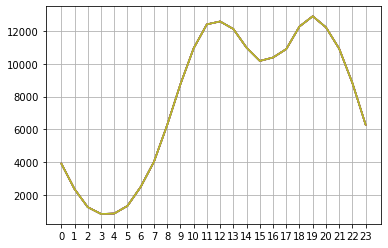

In [125]:
hours =[hour for hour,df in all_data.groupby('Hour')]

plt.plot(hours,all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.show()

### 12PM AND 7PM had been the peak hours of the sale.It can be because of mostly morning chores are done by around 10-11 AM and people usually get out of the office by 6 PM. They rest and have free time.
### These hours can be the best time to advertise the products to target greater audience.

## What products are often sold together ?

In [126]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] =df.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))
df= df[['Order ID','Grouped']].drop_duplicates()
df.head()

<ipython-input-126-8562d0bb17da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] =df.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [121]:
from itertools import combinations
from collections import  Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
                 
                 
for key,value in count.most_common():
    print(key,value)             

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin

### Iphones and Lighting charging cable are most sold items together. Also Google phone and USB-C charging cable are sold together. Hence we can put some offers on the items for good sale.

In [144]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


# what product sold the most ? why was it sold the most ?

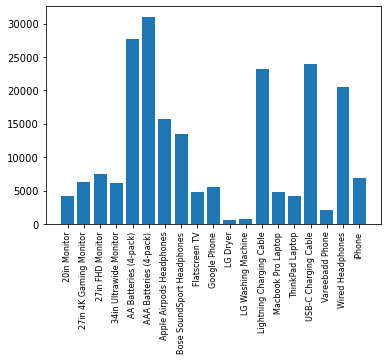

In [119]:
product_ordered = all_data.groupby(['Product'])
Quantity_Ordered = product_ordered.sum()["Quantity Ordered"]

products = [product for product,df in product_ordered]
plt.bar(products,Quantity_Ordered)
plt.xticks(products,rotation ="vertical" ,size =8)
plt.show()

<ipython-input-143-b3602d29f82d>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation ="vertical" ,size =8)


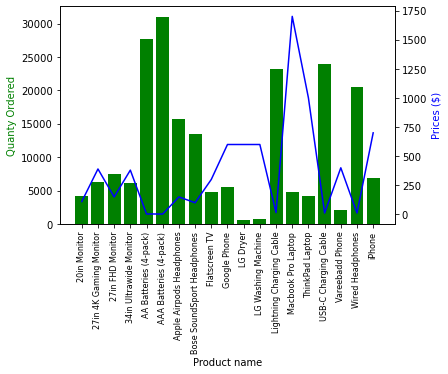

In [143]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, Quantity_Ordered,color='g')
ax2.plot(products,prices,'b-')

ax1.set_xticklabels(products,rotation ="vertical" ,size =8)
ax1.set_xlabel('Product name')
ax1.set_ylabel('Quanty Ordered', color='g')
ax2.set_ylabel('Prices ($)', color='b')
plt.show()

### AAA and AA batteries are most sold products respectively. the cheap the product is the most it is sold. 